In [1]:
import lsst.afw.display as afwDisplay
from lsst.daf.butler import Butler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.table import QTable

In [2]:
butler = Butler('/home/jahumada/data_hits')
registry = butler.registry
for col in registry.queryCollections():
    print(col)

DECam/calib
DECam/calib/unbounded
DECam/calib/curated/19700101T000000Z
DECam/calib/curated/20130115T013000Z
DECam/calib/curated/20130916T092600Z
DECam/calib/curated/20140117T012900Z
DECam/calib/curated/20141020T103000Z
DECam/calib/curated/20150105T011500Z
DECam/calib/curated/20131130T000000Z
DECam/raw/all
DECam/raw/crosstalk-sources
DECam/raw/crosstalk-sources/20211008T204015Z
hits_master_calib/20150217_bias
hits_master_calib/20150217_bias/20211011T182910Z
hits_master_calib/20150217_flats
hits_master_calib/20150217_flats/20211011T194658Z
DECam/calib/20150217calibs
refcats
processCcdOutputs/20150217_calib
hits_master_calib/20150218_bias
hits_master_calib/20150218_bias/20211022T002123Z
hits_master_calib/on20150219_bias
hits_master_calib/on20150219_bias/20211022T015352Z
hits_master_calib/on20150220_bias
hits_master_calib/on20150220_bias/20211022T015436Z
hits_master_calib/on20150221_bias
hits_master_calib/on20150221_bias/20211022T015505Z
hits_master_calib/on20150219_bias/20211022T015834Z
h

In [12]:
def checkSeeing(collection, visit, data_type):
    see = []
    seeaux = []
    detectors = np.linspace(1,61,61)
    for i in detectors:
        try:
            calexp = butler.get(data_type, visit=visit, detector=int(i), collections=collection, instrument='DECam')
            sigma2fwhm = 2.*np.sqrt(2.*np.log(2.))
            psf = calexp.getPsf()
            arsec_to_pixel = 0.2626
            seeing = psf.computeShape(psf.getAveragePosition()).getDeterminantRadius()*sigma2fwhm * arsec_to_pixel
            see.append(seeing)
            seeaux.append(seeing)
            #print('detector: '+str(i)+' seeing: '+str(seeing))
        except:
            see.append(np.nan)
            
            pass
    plt.figure(figsize=(15,5))
    #plt.plot(np.array(detectors).astype('str'), see, 'm*')
    plt.plot(detectors, see, 'm*')
    plt.ylabel('Seeing', fontsize=17)
    plt.xlabel('Detectors', fontsize=17)
    plt.hlines(np.mean(seeaux),0, 61,color='r',linestyle='--', label='Average Seeing = {0:.3g}'.format(np.mean(seeaux)))
    plt.legend(frameon=False,fontsize=12 )
    #plt.xticks(np.array(detectors).astype('str'), rotation=20)
    plt.xticks(detectors, rotation=20)
    plt.xlim(1,61)
    plt.show()
    
    return float('{0:.3g}'.format(np.mean(seeaux)))

In [11]:
exposures = []
data=pd.DataFrame(columns =['exposure','target_name', 'ra', 'dec', 'day_obs'])
for ref in registry.queryDimensionRecords('exposure',where="instrument='DECam' AND exposure.observation_type='science'"):
    exposures.append(ref.dataId['exposure'])
    #print(ref.day_obs)
    new_row = {'exposure':ref.dataId['exposure'], 'target_name':ref.target_name, 'ra':ref.tracking_ra, 'dec':ref.tracking_dec, 'day_obs':ref.day_obs}
    data = data.append(new_row, ignore_index=True)

OD = data[data['target_name']=='Blind15A_02'].day_obs

In [7]:
def ObsDay(od):
    od_format = []
    for i in od:
        day = str(i)[6:]
        year = str(i)[0:4]
        month = str(i)[4:6]
        obsday = "{}/{}/{}".format(day,month,year)
        od_format.append(obsday)
    return od_format

Visits:  410891


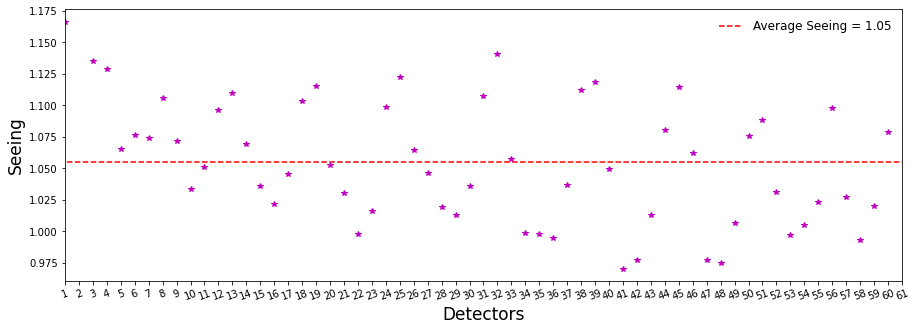

Visits:  410947


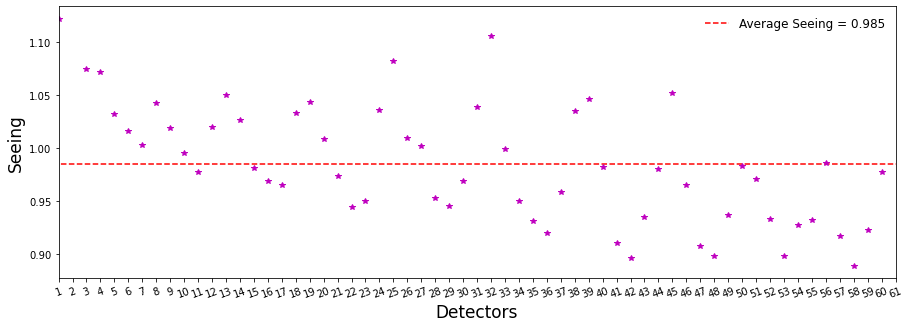

Visits:  410997


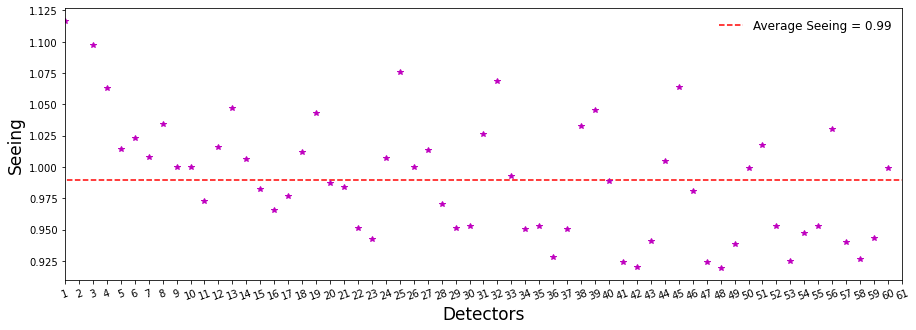

Visits:  411432


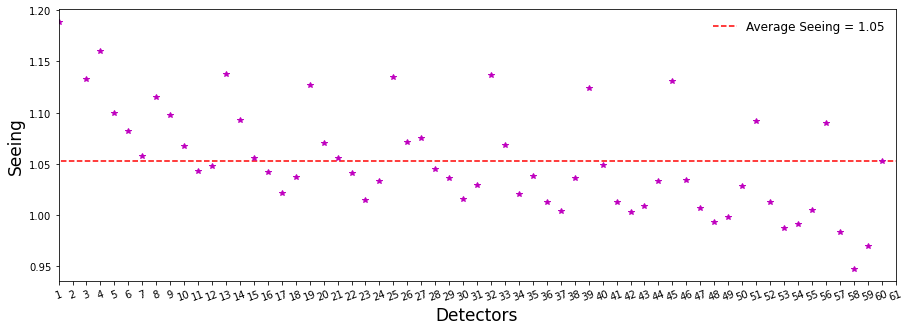

Visits:  411231


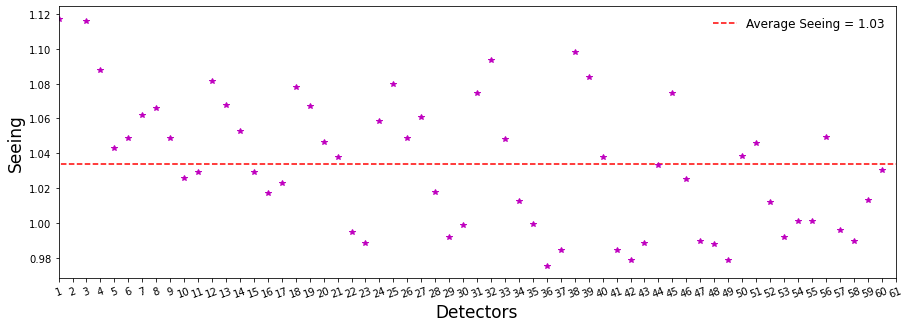

Visits:  411281


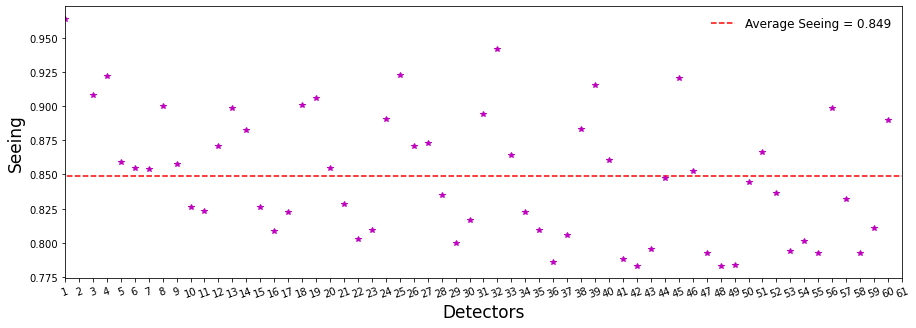

Visits:  411331


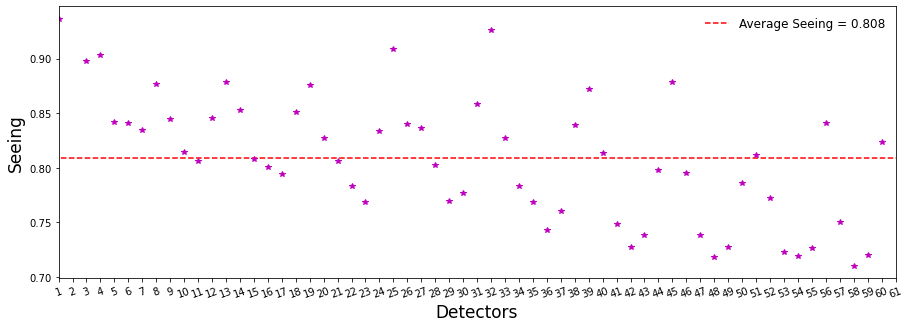

Visits:  411381


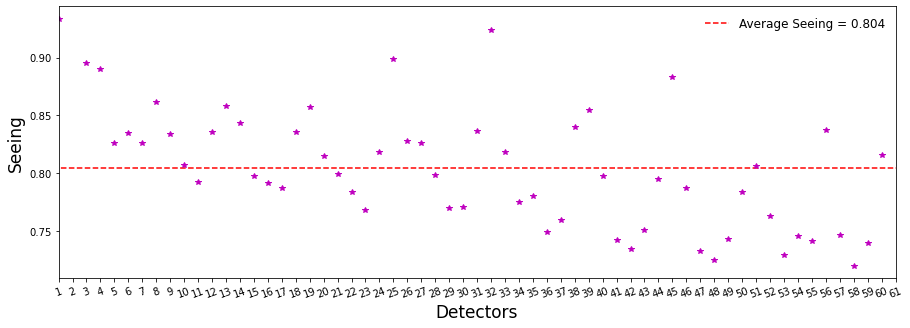

Visits:  411633


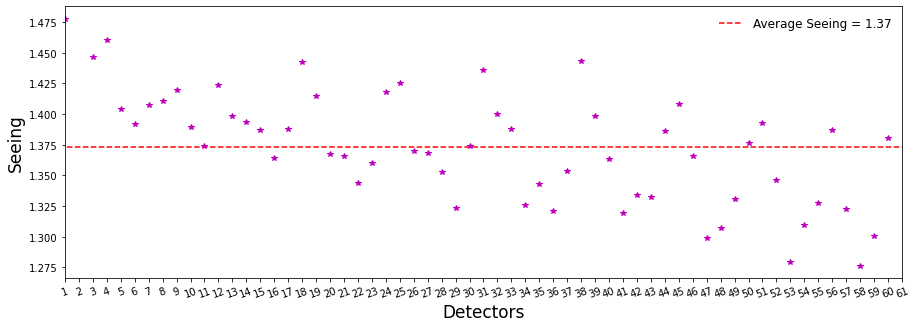

Visits:  411784


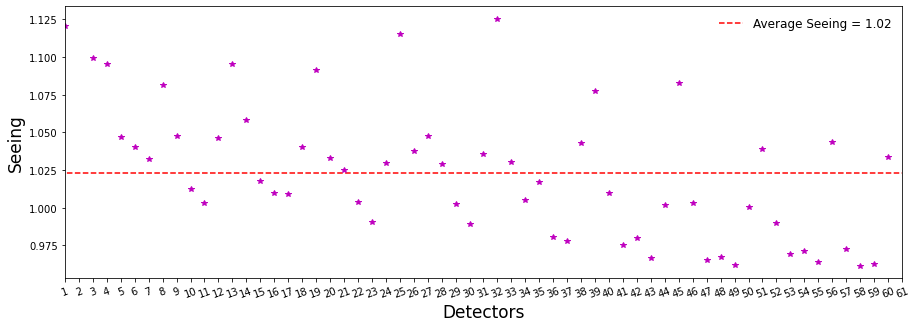

Visits:  411834


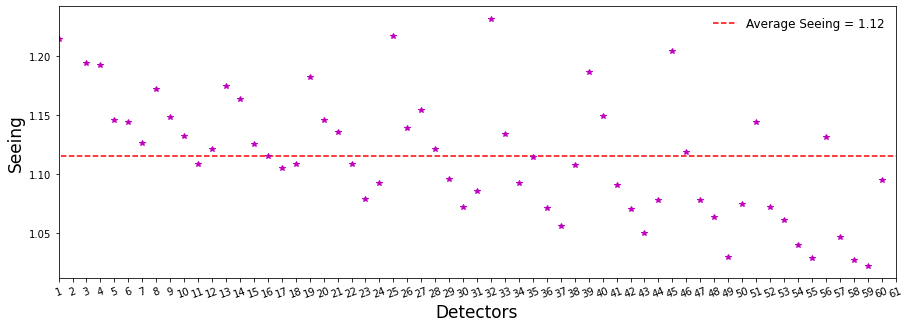

Visits:  411683


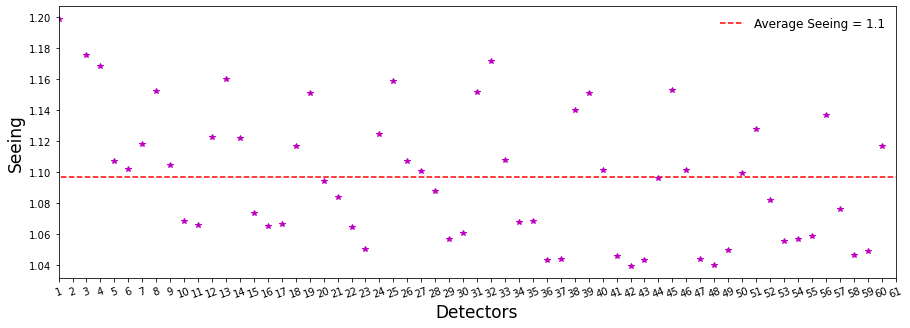

Visits:  411734


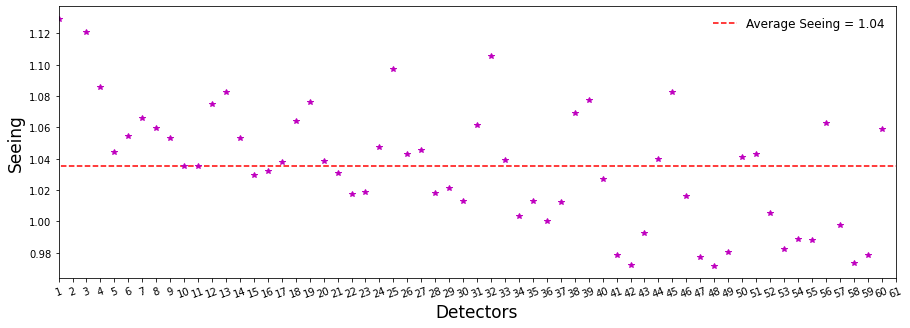

Visits:  412036


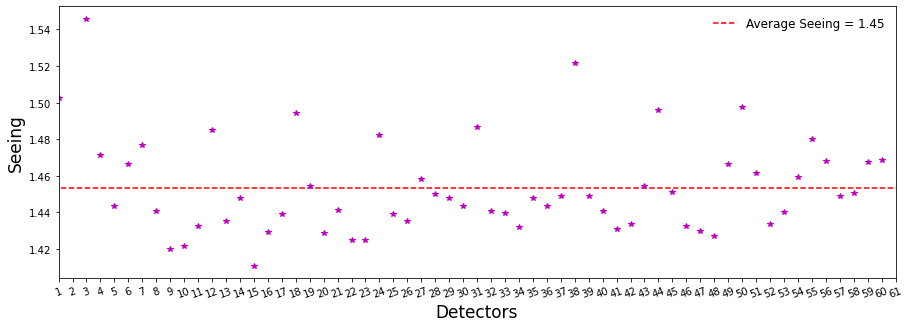

Visits:  412086


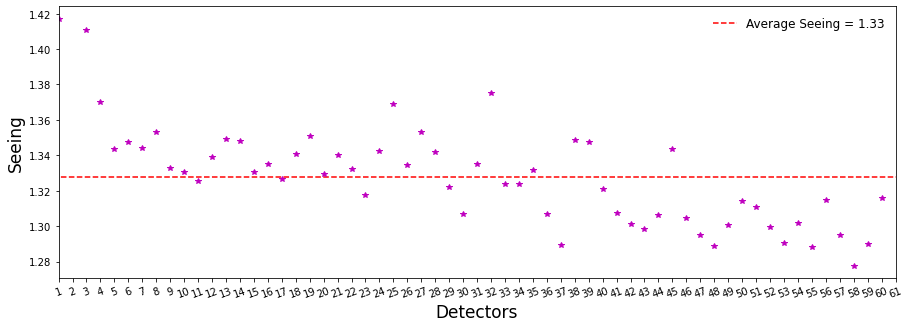

Visits:  412226


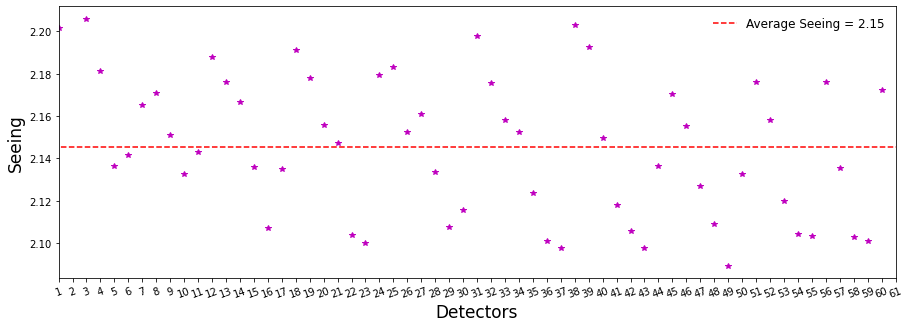

Visits:  412280


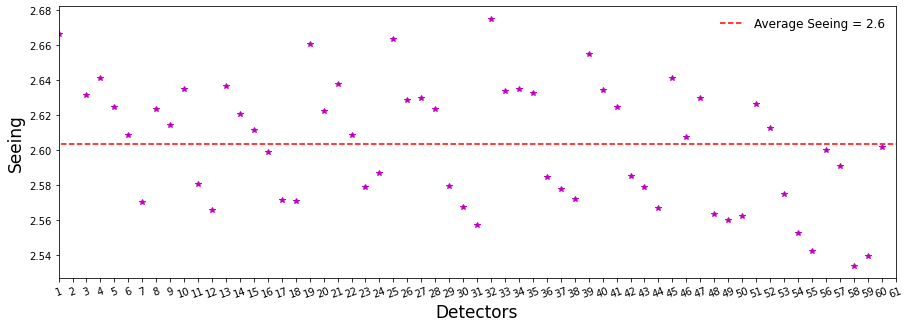

Visits:  742019


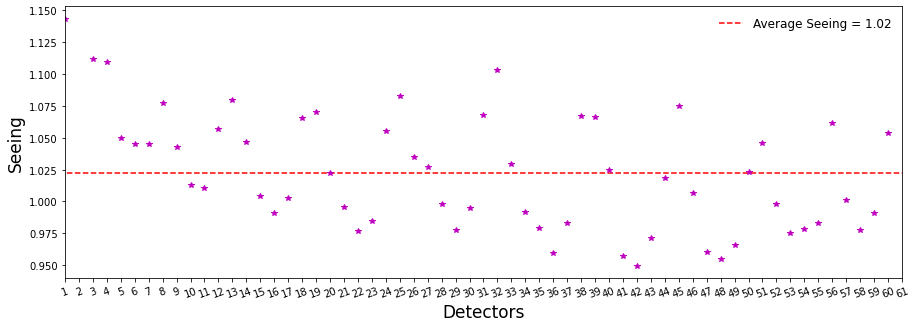

Visits:  742013


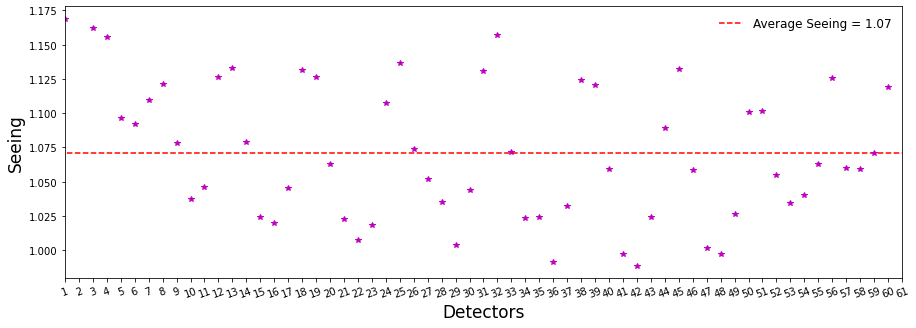

Visits:  742020


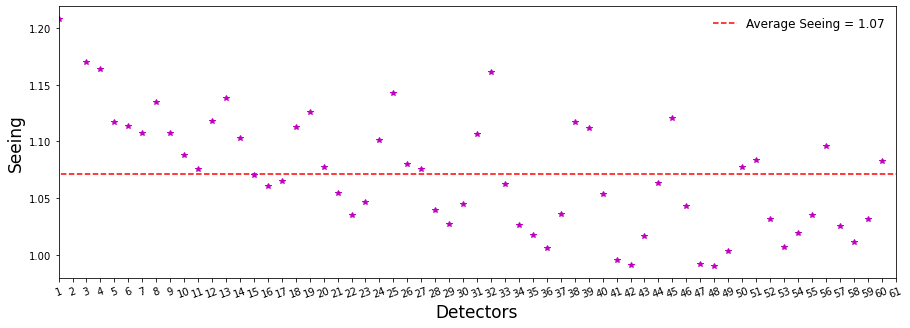

Visits:  742014


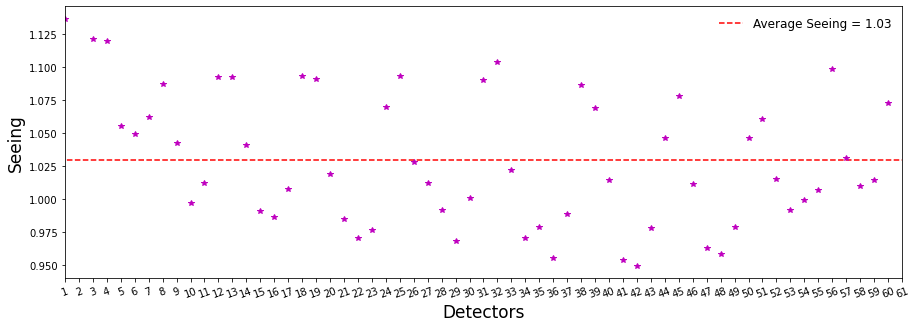

exposure,average seeing,Obs. Day
,arcsec,
int64,float64,str10
410891,1.05,17/02/2015
410947,0.985,17/02/2015
410997,0.99,17/02/2015
411432,1.05,18/02/2015
411231,1.03,18/02/2015
411281,0.849,18/02/2015
411331,0.808,18/02/2015
411381,0.804,18/02/2015


In [15]:
collection = 'processCcdOutputs/Blind15A_02'
visits = [410891,
 410947,
 410997,
 411432,
 411231,
 411281,
 411331,
 411381,
 411633,
 411784,
 411834,
 411683,
 411734,
 412036,
 412086,
 412226,
 412280,
 742019,
 742013,
 742020,
 742014]

OD = data[data['target_name']=='Blind15A_02'].day_obs
OD_v2 = ObsDay(OD)
avg_seeing = []
for i in visits:
    print('Visits: ',i)
    avg_seeing.append(checkSeeing(collection,i,'calexp'))

t = QTable([visits, avg_seeing*u.arcsec, OD_v2],
            names=('exposure', 'average seeing', 'Obs. Day'),
            meta={'name': 'first table'})
t

In [10]:
t

exposure,average seeing,Obs. Day
,arcsec,
int64,float64,str10
410891,1.05,17/02/2015
410947,0.985,17/02/2015
410997,0.99,17/02/2015
411432,1.05,18/02/2015
411231,1.03,18/02/2015
411281,0.849,18/02/2015
411331,0.808,18/02/2015
411381,0.804,18/02/2015


In [16]:
data[data['target_name']=='Blind15A_16']

,exposure,target_name,ra,dec,day_obs
19,411011,Blind15A_16,145.310077,1.700699,20150217
35,410961,Blind15A_16,145.310035,1.700699,20150217
156,410905,Blind15A_16,145.310110,1.700672,20150217
204,411446,Blind15A_16,145.310110,1.700699,20150218
296,411396,Blind15A_16,145.310077,1.700644,20150218
311,411245,Blind15A_16,145.310152,1.700672,20150218
316,411295,Blind15A_16,145.310077,1.700644,20150218
338,411345,Blind15A_16,145.310152,1.700699,20150218
451,411647,Blind15A_16,145.309944,1.700672,20150219
461,411798,Blind15A_16,145.310110,1.700672,20150219


In [12]:
v = 412226
calexp = butler.get('calexp', visit=v, detector=12, collections=collection, instrument='DECam')

LookupError: Dataset calexp with data ID {instrument: 'DECam', detector: 12, visit: 412226} could not be found in collections processCcdOutputs/Blind15A_02.

In [22]:
20150217

20150217

In [32]:
str(data[data['target_name']=='Blind15A_02'].iloc[0].day_obs)[6:]

'17'